# Flight Delays Exploratory Data Analysis

In [0]:
import numpy as np
import pandas as pd
#import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
# Thiner line width
# globally
from matplotlib import rcParams
rcParams['patch.linewidth'] = 0.0 #0.5
# or for only this plot
#_= plt.hist(data, bins=bins, linewidth=0.0)

In [0]:
COLAB = True

In [ ]:
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    data_path = '/content/drive/My Drive/Colab Notebooks/schedule_dataset.xlsx'
else:
    data_path = 'schedule_dataset.xlsx'  

In [0]:
df = pd.read_excel(data_path)

In [0]:
df.columns

Index(['Дата рейса', 'Рейс', 'А/П отправл', 'А/П прибыт', 'Номер ВС',
       'Время отправления по расписанию', 'Время отправления фактическое',
       'Время прибытия по расписанию', 'Время прибытия фактическое'],
      dtype='object')

In [0]:
new_col_names=['date','flight','dep','dst','plane_id','dep_time_sched','dep_time_fact','dst_time_sched','dst_time_fact']
df.columns = new_col_names

In [0]:
df.info()
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139732 entries, 0 to 139731
Data columns (total 9 columns):
date              139732 non-null datetime64[ns]
flight            139732 non-null int64
dep               139732 non-null object
dst               139732 non-null object
plane_id          139732 non-null int64
dep_time_sched    139732 non-null datetime64[ns]
dep_time_fact     139732 non-null datetime64[ns]
dst_time_sched    139732 non-null datetime64[ns]
dst_time_fact     139732 non-null datetime64[ns]
dtypes: datetime64[ns](5), int64(2), object(2)
memory usage: 9.6+ MB
              flight       plane_id
count  139732.000000  139732.000000
mean      413.544829     112.266675
std       253.934144      67.869558
min         1.000000       1.000000
25%       202.000000      54.000000
50%       398.000000     107.000000
75%       599.000000     172.000000
max      1074.000000     246.000000


,date,flight,dep,dst,plane_id,dep_time_sched,dep_time_fact,dst_time_sched,dst_time_fact
0,2018-03-01,1,MOW,ARH,1,2018-03-01 00:05:00,2018-02-28 23:48:00,2018-03-01 02:00:00,2018-03-01 01:48:00
1,2018-03-01,2,MOW,EGO,2,2018-03-01 00:05:00,2018-03-01 00:00:00,2018-03-01 01:30:00,2018-03-01 01:55:00
2,2018-03-01,3,MOW,AKX,3,2018-03-01 00:15:00,2018-03-01 00:14:00,2018-03-01 02:40:00,2018-03-01 02:32:00
3,2018-03-01,4,LED,MOW,4,2018-03-01 00:20:00,2018-03-01 00:11:00,2018-03-01 01:35:00,2018-03-01 01:39:00
4,2018-03-01,5,MOW,KRR,5,2018-03-01 00:25:00,2018-03-01 00:21:00,2018-03-01 02:40:00,2018-03-01 02:41:00


In [0]:
unique_dep = set(df['dep'].unique()) # unique depature airports
print(len(unique_dep), unique_dep)

157 {'TAS', 'KHV', 'ATH', 'IAR', 'SZG', 'WAW', 'HKT', 'VLC', 'KZO', 'IKA', 'NBC', 'PKC', 'AMS', 'FCO', 'BLQ', 'ARH', 'OTP', 'SKD', 'AGP', 'VRN', 'KZN', 'VNO', 'SAW', 'ROV', 'GDZ', 'KIV', 'AYT', 'KUN', 'BAX', 'CDG', 'LAX', 'KGD', 'BUD', 'GUW', 'BKK', 'BEY', 'HMA', 'STW', 'PEK', 'SOF', 'ASF', 'AKX', 'RTW', 'RIX', 'GOJ', 'MMK', 'PVG', 'KJA', 'HAJ', 'DRS', 'KUF', 'SVX', 'IAD', 'KGF', 'SGN', 'TIV', 'MIA', 'ALA', 'GYD', 'LYS', 'SCW', 'EVN', 'IST', 'ULN', 'TFS', 'MUC', 'TSE', 'NOZ', 'MOW', 'SKX', 'GRV', 'GDX', 'CEK', 'TLL', 'NRT', 'OVB', 'VOZ', 'HAM', 'MXP', 'FRA', 'VIE', 'PEE', 'VVO', 'TJM', 'HAV', 'ABA', 'CAI', 'BEG', 'CAN', 'HKG', 'SIP', 'SXF', 'DXB', 'FRU', 'UFA', 'KEJ', 'GNB', 'ZRH', 'ZIA', 'KSN', 'TLV', 'SLY', 'TGD', 'CIT', 'VOG', 'BCN', 'LGW', 'REN', 'ICN', 'SCO', 'IKT', 'EGO', 'AAQ', 'MRV', 'TBS', 'NUX', 'HEL', 'LCA', 'STR', 'MLE', 'PLQ', 'HER', 'SPU', 'NAP', 'AER', 'LTN', 'GVA', 'NCE', 'TOF', 'MAD', 'BRU', 'LED', 'SKG', 'DEL', 'DUS', 'PED', 'BOJ', 'VKO', 'OSL', 'MQF', 'ARN', 'KRR', '

In [0]:
unique_dst = set(df['dst'].unique()) # unique destination airports
print(len(unique_dst), unique_dst)

157 {'TAS', 'KHV', 'ATH', 'IAR', 'SZG', 'WAW', 'HKT', 'DME', 'VLC', 'KZO', 'IKA', 'NBC', 'PKC', 'FCO', 'AMS', 'BLQ', 'ARH', 'OTP', 'SKD', 'AGP', 'VRN', 'KZN', 'VNO', 'SAW', 'ROV', 'GDZ', 'KIV', 'AYT', 'KUN', 'BAX', 'CDG', 'LAX', 'KGD', 'BUD', 'GUW', 'BKK', 'BEY', 'HMA', 'STW', 'PEK', 'SOF', 'ASF', 'AKX', 'RTW', 'RIX', 'GOJ', 'MMK', 'PVG', 'KJA', 'HAJ', 'DRS', 'KUF', 'SVX', 'IAD', 'KGF', 'TIV', 'SGN', 'MIA', 'GYD', 'ALA', 'LYS', 'SCW', 'EVN', 'IST', 'ULN', 'TFS', 'MUC', 'TSE', 'NOZ', 'MOW', 'SKX', 'GRV', 'GDX', 'CEK', 'TLL', 'NRT', 'OVB', 'VOZ', 'HAM', 'MXP', 'VIE', 'FRA', 'PEE', 'VVO', 'TJM', 'HAV', 'ABA', 'CAI', 'BEG', 'CAN', 'HKG', 'SIP', 'SXF', 'DXB', 'FRU', 'UFA', 'KEJ', 'GNB', 'ZRH', 'ZIA', 'KSN', 'TLV', 'SLY', 'CIT', 'VOG', 'BCN', 'LGW', 'REN', 'ICN', 'SCO', 'IKT', 'EGO', 'AAQ', 'MRV', 'TBS', 'NUX', 'HEL', 'LCA', 'STR', 'MLE', 'PLQ', 'HER', 'SPU', 'NAP', 'AER', 'LTN', 'GVA', 'NCE', 'TOF', 'MAD', 'BRU', 'LED', 'SKG', 'DUS', 'DEL', 'PED', 'BOJ', 'VKO', 'OSL', 'MQF', 'KRR', 'ARN', '

In [0]:
# difference  between depature and destination airport ids
dep_dst_diff = unique_dep.symmetric_difference(unique_dst) 
print("Depature / Destination Difference: ",dep_dst_diff)
print("In depatures: ",unique_dep.intersection(dep_dst_diff))
print("In destinations: ",unique_dst.intersection(dep_dst_diff))
'TGD' in unique_dep, 'DME' in unique_dep, 'TGD' in unique_dst, 'DME' in unique_dst

Depature / Destination Difference:  {'DME', 'TGD'}
In depatures:  {'TGD'}
In destinations:  {'DME'}


(True, False, False, True)

In [0]:
df['date'].min(), df['date'].max() # interval in dates

(Timestamp('2018-03-01 00:00:00'), Timestamp('2018-09-03 00:00:00'))

In [0]:
delta_min = pd.Timedelta(minutes=1) 
delta_min

Timedelta('0 days 00:01:00')

In [0]:
def add_features(df):
    """ Add calculated features: 
        - Flight duration (minutes)
        - Difference between factual and scheduled depature times (minutes)
        - Difference between factual and scheduled destination arrival times (minutes)
    """
    df = df.assign(
        duration = df.apply(lambda row: (row['dst_time_sched'] - row['dep_time_sched']) / delta_min, axis=1))

    df = df.assign(
        dep_diff = df.apply(lambda row: (row['dep_time_fact'] - row['dep_time_sched']) / delta_min, axis=1))

    df = df.assign(
        dst_diff = df.apply(lambda row: (row['dst_time_fact'] - row['dst_time_sched']) / delta_min, axis=1))
            
    return df

In [0]:
df = add_features(df)

In [0]:
print("* Scheduled and factual depature time differences:")
print("-- Positive: ", len(df[df['dep_diff'] > 0]), " Negative: ",len(df[df['dep_diff'] < 0]))
print("-- Min: ", min(df['dep_diff']), " Median: ", np.median(df['dep_diff']), " Max: ",  max(df['dep_diff']))
print("-- Percentiles [25,50,75,90,99]: ", np.percentile(df['dep_diff'],[25,50,75, 90, 99]))
print("* Scheduled and factual arrival time differences: ")
print("-- Positive: ", len(df[df['dst_diff'] > 0]), " Negative: ", len(df[df['dst_diff'] < 0]))
print("-- Min: ", min(df['dst_diff']), " Median: ", np.median(df['dst_diff']), " Max: ", max(df['dst_diff']))
print("-- Percentiles [25,50,75,90,99]: ", np.percentile(df['dst_diff'],[25,50,75, 90, 99]) )

* Scheduled and factual depature time differences:
-- Positive:  19132  Negative:  116875
-- Min:  -362.0  Median:  -7.0  Max:  6324.0
-- Percentiles [25,50,75,90,99]:  [-11.  -7.  -3.   4.  92.]
* Scheduled and factual arrival time differences: 
-- Positive:  55861  Negative:  79222
-- Min:  -953.0  Median:  -2.0  Max:  6355.0
-- Percentiles [25,50,75,90,99]:  [ -9.  -2.   6.  19. 107.]


In [0]:
def plot_hist(data, xlabel, bins=None):
    """ Plot histagram
    """
    if not bins:
        bins = int(np.sqrt(len(data)))
    #_= plt.figure(figsize=(6,8))
    _= plt.xlabel(xlabel)
    _= plt.hist(data, bins=bins)
    #_= plt.hist(data, bins=bins, edgecolor='none')

In [0]:
def plot_ecdf(data, xlabel):
    """Plot ECDF - Empirical Cumulative Distribution function.
    data -is a quantity we are measuring
    y - is a fraction of data that have value smaller then the given value
    """
    x = np.sort(data)
    y = np.arange(1,len(x)+1) / len(x)
    plt.plot(x,y, marker='.', linestyle='none')
    plt.xlabel(xlabel)
    plt.ylabel('fraction')
    plt.show()

# Scheduled and factual depature time differences

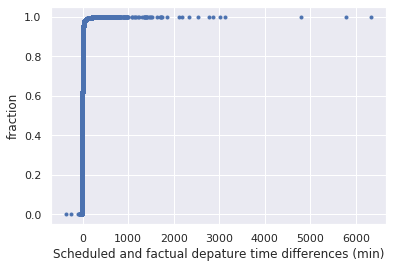

In [0]:
plot_ecdf(df['dep_diff'], 'Scheduled and factual depature time differences (min)')

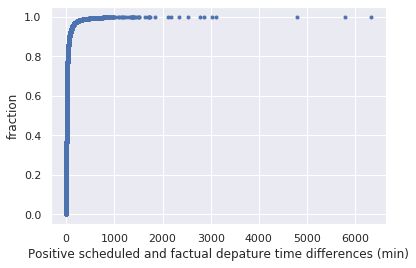

In [0]:
dep_diff_pos = df[df['dep_diff'] > 0]['dep_diff']
plot_ecdf(dep_diff_pos, 'Positive scheduled and factual depature time differences (min)')

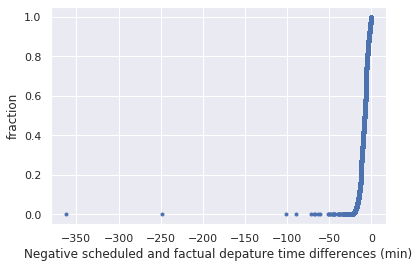

In [0]:
dep_diff_neg = df[df['dep_diff'] < 0]['dep_diff']
plot_ecdf(dep_diff_neg, 'Negative scheduled and factual depature time differences (min)')

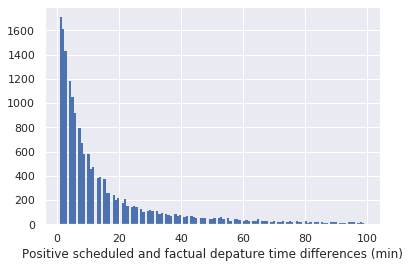

In [0]:
z = df[(df['dep_diff']> 0) & (df['dep_diff']<100)]['dep_diff']
plot_hist(z, xlabel='Positive scheduled and factual depature time differences (min)')

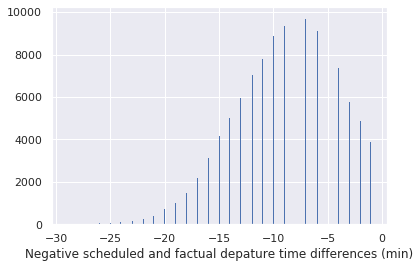

In [0]:
z = df[(df['dep_diff']> -30) & (df['dep_diff']<0)]['dep_diff']
plot_hist(z, xlabel='Negative scheduled and factual depature time differences (min)')

# Scheduled and factual arrival time differences

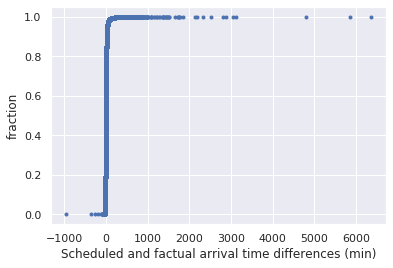

In [0]:
plot_ecdf(df['dst_diff'], 'Scheduled and factual arrival time differences (min)')

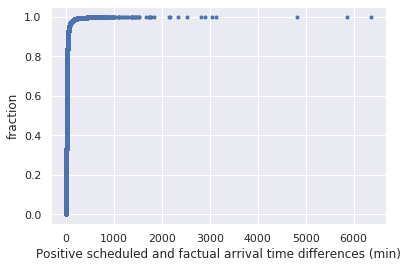

In [0]:
dst_diff_pos = df[df['dst_diff'] > 0]['dst_diff']
plot_ecdf(dst_diff_pos, 'Positive scheduled and factual arrival time differences (min)')

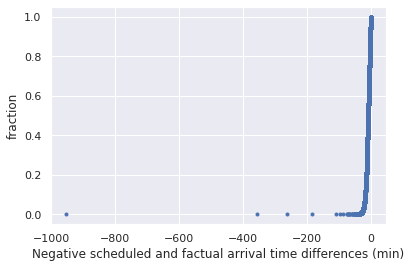

In [0]:
dst_diff_neg = df[df['dst_diff'] < 0]['dst_diff']
plot_ecdf(dst_diff_neg, 'Negative scheduled and factual arrival time differences (min)')

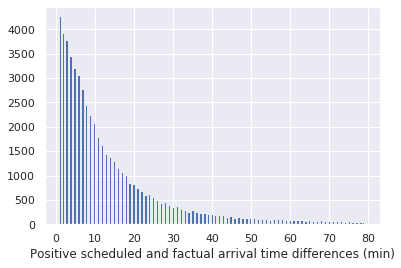

In [0]:
z = df[(df['dst_diff']> 0) & (df['dst_diff']<80)]['dst_diff']
plot_hist(z, xlabel='Positive scheduled and factual arrival time differences (min)')

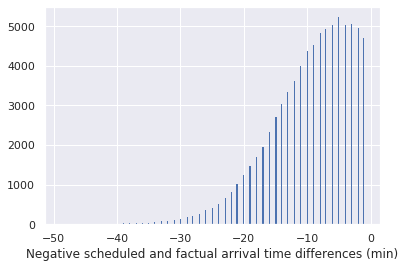

In [0]:
z = df[(df['dst_diff']> -50) & (df['dst_diff']<0)]['dst_diff']
plot_hist(z, xlabel='Negative scheduled and factual arrival time differences (min)')

# Add column with counts of flights per day

In [0]:
# Flight depatures per day'
df['dep_cnt'] = df.groupby(['date','dep'])['date'].transform('size')

In [0]:
df.head()

,date,flight,dep,dst,plane_id,dep_time_sched,dep_time_fact,dst_time_sched,dst_time_fact,duration,dep_diff,dst_diff,dep_cnt
0,2018-03-01,1,MOW,ARH,1,2018-03-01 00:05:00,2018-02-28 23:48:00,2018-03-01 02:00:00,2018-03-01 01:48:00,115.0,-17.0,-12.0,329
1,2018-03-01,2,MOW,EGO,2,2018-03-01 00:05:00,2018-03-01 00:00:00,2018-03-01 01:30:00,2018-03-01 01:55:00,85.0,-5.0,25.0,329
2,2018-03-01,3,MOW,AKX,3,2018-03-01 00:15:00,2018-03-01 00:14:00,2018-03-01 02:40:00,2018-03-01 02:32:00,145.0,-1.0,-8.0,329
3,2018-03-01,4,LED,MOW,4,2018-03-01 00:20:00,2018-03-01 00:11:00,2018-03-01 01:35:00,2018-03-01 01:39:00,75.0,-9.0,4.0,20
4,2018-03-01,5,MOW,KRR,5,2018-03-01 00:25:00,2018-03-01 00:21:00,2018-03-01 02:40:00,2018-03-01 02:41:00,135.0,-4.0,1.0,329


In [0]:
len(df[(df['date'] == '2018-03-01') & (df['dep'] == 'MOW')])

329

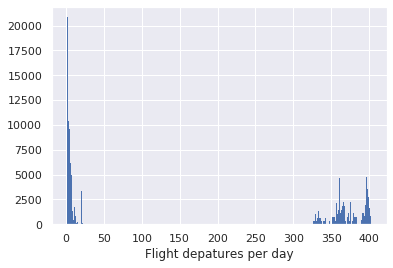

In [0]:
plot_hist(df['dep_cnt'], xlabel='Flight depatures per day')

In [0]:
# Flight arrivals per day
df['dst_cnt'] = df.groupby(['date','dst'])['date'].transform('size')

In [0]:
print("-- Percentiles [25,50,75,90,99]: ", np.percentile(df['dep_cnt'],[25,50,75, 90, 99]) )

-- Percentiles [25,50,75,90,99]:  [  4.  21. 372. 397. 401.]


In [0]:
df.head()

,date,flight,dep,dst,plane_id,dep_time_sched,dep_time_fact,dst_time_sched,dst_time_fact,duration,dep_diff,dst_diff,dep_cnt,dst_cnt
0,2018-03-01,1,MOW,ARH,1,2018-03-01 00:05:00,2018-02-28 23:48:00,2018-03-01 02:00:00,2018-03-01 01:48:00,115.0,-17.0,-12.0,329,3
1,2018-03-01,2,MOW,EGO,2,2018-03-01 00:05:00,2018-03-01 00:00:00,2018-03-01 01:30:00,2018-03-01 01:55:00,85.0,-5.0,25.0,329,2
2,2018-03-01,3,MOW,AKX,3,2018-03-01 00:15:00,2018-03-01 00:14:00,2018-03-01 02:40:00,2018-03-01 02:32:00,145.0,-1.0,-8.0,329,1
3,2018-03-01,4,LED,MOW,4,2018-03-01 00:20:00,2018-03-01 00:11:00,2018-03-01 01:35:00,2018-03-01 01:39:00,75.0,-9.0,4.0,20,331
4,2018-03-01,5,MOW,KRR,5,2018-03-01 00:25:00,2018-03-01 00:21:00,2018-03-01 02:40:00,2018-03-01 02:41:00,135.0,-4.0,1.0,329,7


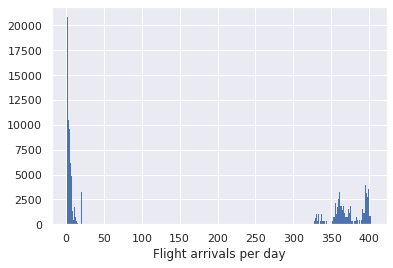

In [0]:
plot_hist(df['dst_cnt'], xlabel='Flight arrivals per day')

In [0]:
print("-- Percentiles [25,50,75,90,99]: ", np.percentile(df['dst_cnt'],[25,50,75, 90, 99]) )

-- Percentiles [25,50,75,90,99]:  [  4.  21. 371. 396. 401.]


# Add month, day, week day, hour and minute of depature and arrival as separate features

In [0]:
df['dep_month'], df['dep_day'], df['dep_weekday'], df['dep_hour'], df['dep_ minute'] =  (df['dep_time_sched'].dt.month, 
                                                                          df['dep_time_sched'].dt.day, 
                                                                          df['dep_time_sched'].dt.weekday,
                                                                          df['dep_time_sched'].dt.hour, 
                                                                          df['dep_time_sched'].dt.minute)

In [0]:
df['dst_month'], df['dst_day'], df['dst_weekday'], df['dst_hour'], df['dst_ minute'] =  (df['dst_time_sched'].dt.month, 
                                                                          df['dst_time_sched'].dt.day, 
                                                                          df['dst_time_sched'].dt.weekday,
                                                                          df['dst_time_sched'].dt.hour, 
                                                                          df['dst_time_sched'].dt.minute)

In [0]:
df.head()

,date,flight,dep,dst,plane_id,dep_time_sched,dep_time_fact,dst_time_sched,dst_time_fact,duration,dep_diff,dst_diff,dep_cnt,dst_cnt,dep_month,dep_day,dep_weekday,dep_hour,dep_ minute,dst_month,dst_day,dst_weekday,dst_hour,dst_ minute
0,2018-03-01,1,MOW,ARH,1,2018-03-01 00:05:00,2018-02-28 23:48:00,2018-03-01 02:00:00,2018-03-01 01:48:00,115.0,-17.0,-12.0,329,3,3,1,3,0,5,3,1,3,2,0
1,2018-03-01,2,MOW,EGO,2,2018-03-01 00:05:00,2018-03-01 00:00:00,2018-03-01 01:30:00,2018-03-01 01:55:00,85.0,-5.0,25.0,329,2,3,1,3,0,5,3,1,3,1,30
2,2018-03-01,3,MOW,AKX,3,2018-03-01 00:15:00,2018-03-01 00:14:00,2018-03-01 02:40:00,2018-03-01 02:32:00,145.0,-1.0,-8.0,329,1,3,1,3,0,15,3,1,3,2,40
3,2018-03-01,4,LED,MOW,4,2018-03-01 00:20:00,2018-03-01 00:11:00,2018-03-01 01:35:00,2018-03-01 01:39:00,75.0,-9.0,4.0,20,331,3,1,3,0,20,3,1,3,1,35
4,2018-03-01,5,MOW,KRR,5,2018-03-01 00:25:00,2018-03-01 00:21:00,2018-03-01 02:40:00,2018-03-01 02:41:00,135.0,-4.0,1.0,329,7,3,1,3,0,25,3,1,3,2,40


In [0]:
# Drop datetime64[ns] features 
df2 = df.drop(columns=['date', 'dep_time_sched', 'dep_time_fact', 'dst_time_sched', 'dst_time_fact'])

In [0]:
df2.head()

,flight,dep,dst,plane_id,duration,dep_diff,dst_diff,dep_cnt,dst_cnt,dep_month,dep_day,dep_weekday,dep_hour,dep_ minute,dst_month,dst_day,dst_weekday,dst_hour,dst_ minute
0,1,MOW,ARH,1,115.0,-17.0,-12.0,329,3,3,1,3,0,5,3,1,3,2,0
1,2,MOW,EGO,2,85.0,-5.0,25.0,329,2,3,1,3,0,5,3,1,3,1,30
2,3,MOW,AKX,3,145.0,-1.0,-8.0,329,1,3,1,3,0,15,3,1,3,2,40
3,4,LED,MOW,4,75.0,-9.0,4.0,20,331,3,1,3,0,20,3,1,3,1,35
4,5,MOW,KRR,5,135.0,-4.0,1.0,329,7,3,1,3,0,25,3,1,3,2,40


In [0]:
# Save features to be used in models
df2.to_csv("flight_features.csv")

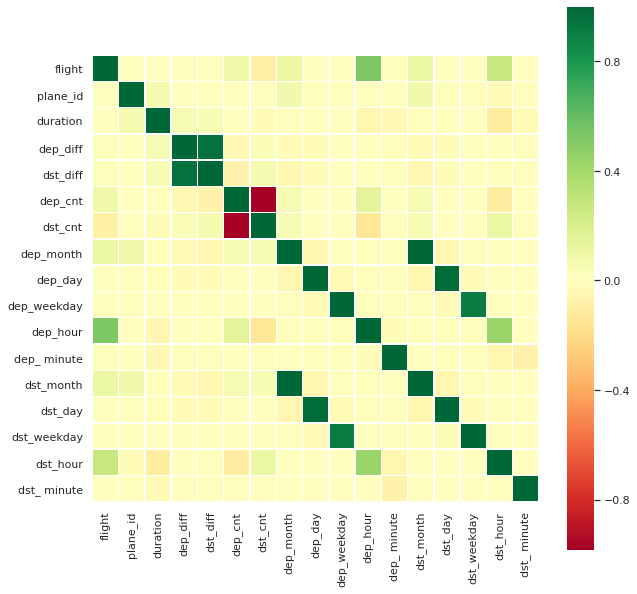

In [0]:
# Heatmap showing the correlation between the different features of the flights df2 dataset.
# Cells that are in green show positive correlation, 
# while cells that are in red show negative correlation.
#sns.heatmap(df2.corr(), square=True, cmap='RdYlGn')
df3 = df2.drop(columns=['dep', 'dst'])
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df3.corr(), square=True, cmap='RdYlGn', linewidths=.5, ax=ax)

In [0]:
# Apply label encoder to each column with categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2['dep'] = label_encoder.fit_transform(df2['dep'])
df2['dst'] = label_encoder.fit_transform(df2['dst'])

In [0]:
df2.head()

,flight,dep,dst,plane_id,duration,dep_diff,dst_diff,dep_cnt,dst_cnt,dep_month,dep_day,dep_weekday,dep_hour,dep_ minute,dst_month,dst_day,dst_weekday,dst_hour,dst_ minute
0,1,85,8,1,115.0,-17.0,-12.0,329,3,3,1,3,0,5,3,1,3,2,0
1,2,85,33,2,85.0,-5.0,25.0,329,2,3,1,3,0,5,3,1,3,1,30
2,3,85,4,3,145.0,-1.0,-8.0,329,1,3,1,3,0,15,3,1,3,2,40
3,4,75,86,4,75.0,-9.0,4.0,20,331,3,1,3,0,20,3,1,3,1,35
4,5,85,68,5,135.0,-4.0,1.0,329,7,3,1,3,0,25,3,1,3,2,40
